# Calculating dx/dy

In [1]:
import pandas_ta as ta
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot


con = duckdb.connect(r"C:\Users\rybot\OneDrive\Databases\datadump.duckdb")
print(con)

qry = '''
    SELECT * FROM Stocks
    WHERE EXTRACT(YEAR FROM Datetime) = 2023 
    AND Stock = 'AAPL' 
    AND Interval = 1
'''

df = con.execute(qry).fetchdf()
# Sort the Data from oldest to newest
df = df.sort_values(by='Datetime').reset_index(drop=True)


In [11]:
df['Time_Diff'] = df['Datetime'].diff().dt.total_seconds()

df['ROC'] = df['close'].diff() / df['Time_Diff']
df['Second ROC'] = df['ROC'].diff() / df['Time_Diff']

Text(0, 0.5, 'dx/dy')

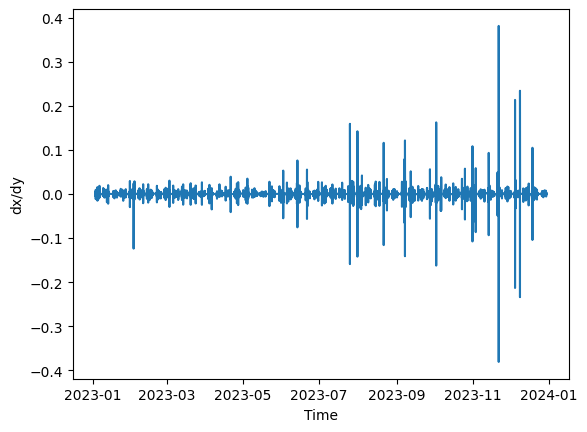

In [10]:
import matplotlib.pyplot as plt

plt.plot(df['Datetime'],df['First Derivative'])
#plt.plot(df['Datetime'],df['close'])
plt.xlabel('Time')
plt.ylabel('dx/dy')